In [1]:
%cd /content/drive/MyDrive/KInsekten/ProtoPNet/ProtoPNet

/content/drive/MyDrive/KInsekten/ProtoPNet/ProtoPNet


In [ ]:
#!git clone https://github.com/cfchen-duke/ProtoPNet.git

Cloning into 'ProtoPNet'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.
Checking out files: 100% (27/27), done.


### Crop to BBoxes

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

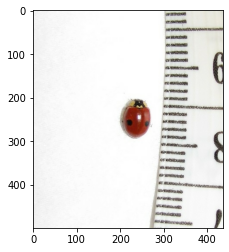

In [ ]:
#img = cv2.imread("/content/drive/MyDrive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec/val_Insecta/00302_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Adalia_bipunctata/01703b4f-f0fd-4b47-8f79-ceff9d6778ad.jpg")
#cv2_imshow(img)

img = Image.open("/content/drive/MyDrive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec/val_Insecta/00302_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Adalia_bipunctata/01703b4f-f0fd-4b47-8f79-ceff9d6778ad.jpg")
plt.imshow(img)

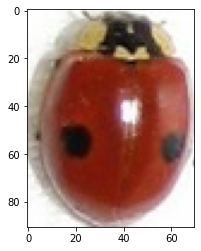

In [ ]:
x, y, b, h = 201, 203, 70, 91 # index 10235 in iNat_3

#cv2_imshow(img[y : y+h, x : x+b])
plt.imshow(img.crop((x, y, x+b, y+h)))

In [ ]:
%cd datasets/iNat_3spec

/content/drive/My Drive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec


In [ ]:
%cd ..

/content/drive/My Drive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec


In [ ]:
ind_fname = {}
#f = open('val_indexes.txt', 'r')
f = open('train_indexes.txt', 'r')

for line in f:
  ind, fname = line.split()
  ind_fname[ind] = fname
f.close()

In [ ]:
ind_bbox = {}
#f = open('val_bboxes.txt', 'r')
f = open('train_bboxes.txt', 'r')

for line in f:
  ind, x, y, b, h = line.split()
  ind_bbox[ind] = [int(float(x)), int(float(y)), int(float(b)), int(float(h))]
f.close()

In [ ]:
#%cd val_Insecta/
%cd train_Insecta/

/content/drive/My Drive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec/train_Insecta


In [ ]:
import glob
specs = glob.glob('*')
specs

['02691_Animalia_Arthropoda_Insecta_Orthoptera_Tettigoniidae_Tettigonia_viridissima',
 '00450_Animalia_Arthropoda_Insecta_Diptera_Muscidae_Musca_domestica',
 '00302_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Adalia_bipunctata']

In [ ]:
for spec in specs:
  files = glob.glob(spec + '/*')
  for f in files:
    try: # there was one fly removed which does not show up in the bbox list
      ind  = list(ind_fname.keys())[list(ind_fname.values()).index(f)] # get index from file name
      bbox = ind_bbox[ind] # get bbox coords from index
      x, y, b, h = tuple(bbox)

      img = Image.open(f)
      img.crop((x, y, x+b, y+h)).save('/content/drive/MyDrive/KInsekten/ProtoPNet/ProtoPNet/datasets/iNat_3spec/train_Insecta_cropped/' + f, 'JPEG')
    except:
      continue

### Train

In [3]:
!pip install Augmentor

In [20]:
# Note: line 143 in Augmentor/Pipeline.py -> code creates folder with augmented images inside folder with source images 
#                                         -> I modified that line to keep aug. images outside source folder
import Augmentor
Augmentor.Pipeline()

In [21]:
!python img_aug.py

Initialised with 300 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC59144450>: 100% 300/300 [00:02<00:00, 131.94 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC591A7BD0>: 100% 300/300 [00:02<00:00, 122.60 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC591817D0>: 100% 300/300 [00:02<00:00, 121.54 Samples/s]
Initialised with 300 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC59146E90>: 100% 300/300 [00:02<00:00, 121.91 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC5E1EE450>: 100% 300/300 [00:02<00:00, 123.05 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC591A4E50>: 100% 300/300 [00:02<00:00, 122.86 Samples/s]
Initialised with 300 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=79x93 at 0x7EFC5EF345D0>: 100% 300/300 [00:02<00:00, 123.58 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=79x93 at

In [22]:
!python main.py

0
training set size: 899
push set size: 899
test set size: 30
batch size: 16
start training
epoch: 	0
	warm
	train
	time: 	3.6583571434020996
	cross ent: 	0.997725902942189
	cluster: 	4.779717524846395
	separation:	5.245486976807578
	avg separation:	12.598401588306093
	accu: 		54.06006674082313%
	l1: 		60.0
	p dist pair: 	20.005292892456055
	test
	time: 	0.2967870235443115
	cross ent: 	0.704266682267189
	cluster: 	0.7895553112030029
	separation:	1.7333145141601562
	avg separation:	10.954007744789124
	accu: 		90.0%
	l1: 		60.0
	p dist pair: 	20.005292892456055
	above 70.00%
epoch: 	1
	joint
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pyto